In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Caminhos para os arquivos CSV
caminho_arquivo_10_min = '/home/patrick/Documents/milan-telecom-analysis-2022-10-11/Dataset/telecom-sms,call,internet - per_cell/1.csv'
caminho_arquivo_1_hora = '/home/patrick/Documents/milan-telecom-analysis-2022-10-11/Dataset/telecom-sms,call,internet - per_cell HOURLY/1.csv'

# Lê os arquivos CSV em DataFrames
df_10_min = pd.read_csv(caminho_arquivo_10_min, index_col=0)
df_1_hora = pd.read_csv(caminho_arquivo_1_hora, index_col=0)

In [6]:
df_10_min.head()

,country_code_1,sms_in_1,sms_out_1,call_in_1,call_out_1,internet_traffic_1
1383260400000,39,0.223227,0.156787,0.160938,0.052275,11.028366
1383261000000,72,0.415040,0.119926,0.188777,0.160938,11.127101
1383261600000,39,0.384079,0.170952,0.134176,0.054601,10.892771
1383262200000,39,0.707572,0.220815,0.027300,0.053438,8.622425
1383262800000,39,0.270679,0.192891,0.053438,0.080738,8.009927


In [8]:
df_1_hora.head()

,country_code_1,sms_in_1,sms_out_1,call_in_1,call_out_1,internet_traffic_1,Data
timestamp,,,,,,,
2013-10-31 21:00:00,150,1.022346,0.447665,0.483891,0.267814,33.048238,2013-10-31 21:00:00
2013-10-31 22:00:00,273,2.007073,1.174176,0.298603,0.355616,54.679250,2013-10-31 22:00:00
2013-10-31 23:00:00,195,0.385328,0.416203,0.027925,0.027300,34.983431,2013-10-31 23:00:00
2013-11-01 00:00:00,322,1.128965,0.789473,0.001787,0.134801,43.480040,2013-11-01 00:00:00
2013-11-01 01:00:00,195,0.568658,0.432155,0.001787,0.000000,25.086062,2013-11-01 01:00:00


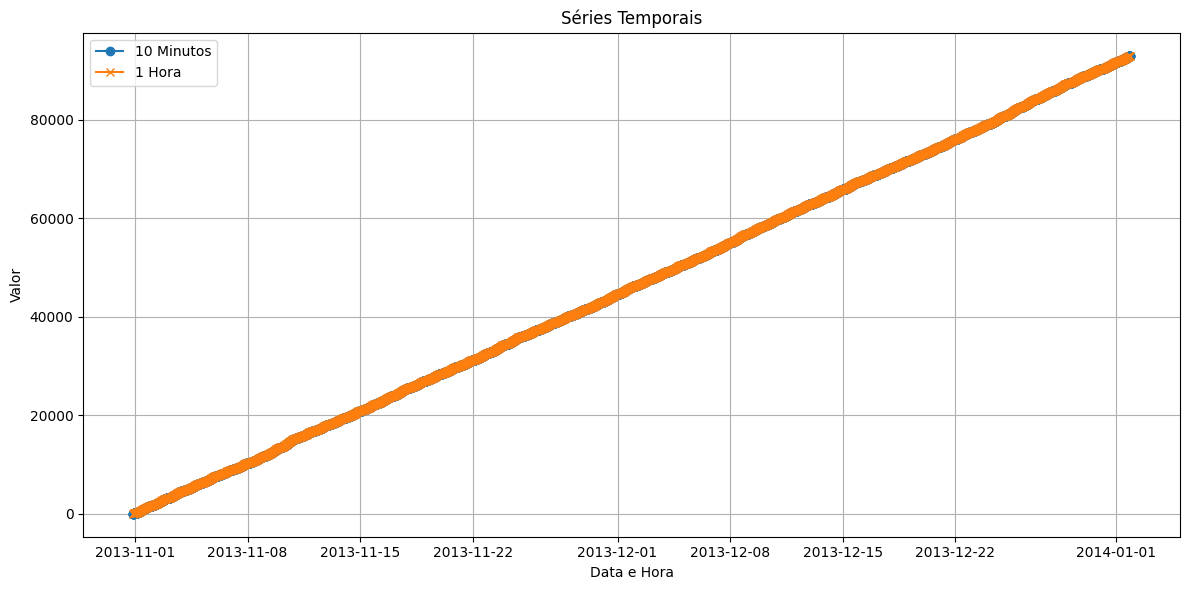

In [11]:
from datetime import datetime

# Converte as colunas de datas para datetime
df_10_min['timestamp'] = df_10_min.index
df_10_min['Data'] = df_10_min['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

df_1_hora['Data'] = pd.to_datetime(df_1_hora.index)

# Cria o gráfico
plt.figure(figsize=(12, 6))

# Plota a série temporal de 10 minutos
plt.plot(df_10_min['Data'], df_10_min['internet_traffic_1'].cumsum(), label='10 Minutos', marker='o', linestyle='-')

# Plota a série temporal de 1 hora
plt.plot(df_1_hora['Data'], df_1_hora['internet_traffic_1'].cumsum(), label='1 Hora', marker='x', linestyle='-')

# Configuração do gráfico
plt.title('Séries Temporais')
plt.xlabel('Data e Hora')
plt.ylabel('Valor')
plt.legend()

# Mostra o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
